In [15]:
import openai
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

openai.api_key = open('/Users/tuomasr/Library/Mobile Documents/com~apple~CloudDocs/School/ECS/ECS 171/Group Proj/key/Group_13_Project_Key.txt').read().strip('\n')

def wordCloudGen(scores):
    # change the value to black
    def black_color (word, font_size, position, orientation, random_state = None, **kwargs):
        return ("hsl(0, 100%, 1%)")

    # set the background color to white
    # word cloud for the fisrt person "Baeley Parisien"
    wordcloud = WordCloud(stopwords=STOPWORDS, 
                          background_color = "white", 
                          width = 900, 
                          height = 500).generate_from_frequencies(scores.all())

    # set the word color to black
    wordcloud.recolor(color_func = black_color)

    # set the figsize
    # plt.figure(figsize = [15, 10])

    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.show()

def letter_gen(user_name):
    name = ' '.join(user_name)
    text = f'Pretend you are a professor for at a popular university. You are asked by one of your students ({name}) if you can write them a letter of recommendation. Make up any information about them you feel is relevant to convey their abilities. Choose a field of study you believe is most fitting for them. Please do not include the heading'
    completion = openai.ChatCompletion.create(
        model="gpt-3.5-turbo", # this is "ChatGPT" $0.002 per 1k tokens
        messages=[{"role": "user", "content": text}]
    )
    reply_content = completion.choices[0].message.content

    # process data with tf-idf and exclude common stopwords
    vectorizer = TfidfVectorizer(stop_words='english')
    scores = vectorizer.fit_transform([reply_content]).toarray()

    # get term/feature names
    terms = vectorizer.get_feature_names_out()

    # form table of names with tf-idf scores corresponding to each term in their responses
    name_scores = pd.DataFrame(scores, columns=terms)
    # name_scores.insert(0, 'name', user_name)

    wordCloudGen(name_scores)

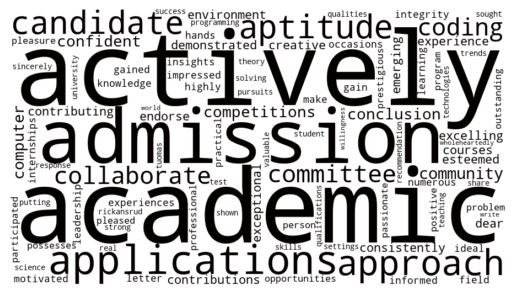

In [19]:
user = input('Enter Full Name: ')
letter_gen(user)